In [1]:
from Bio import SeqIO
import matplotlib.pyplot as plt

In [3]:
# Path to your .fasta file
fasta_file = "SRR_001.fasta"

In [5]:
# List to hold sequence lengths
sequence_lengths = []

# Parse the FASTA file and extract sequence lengths
for record in SeqIO.parse(fasta_file, "fasta"):
    sequence_lengths.append(len(record.seq))

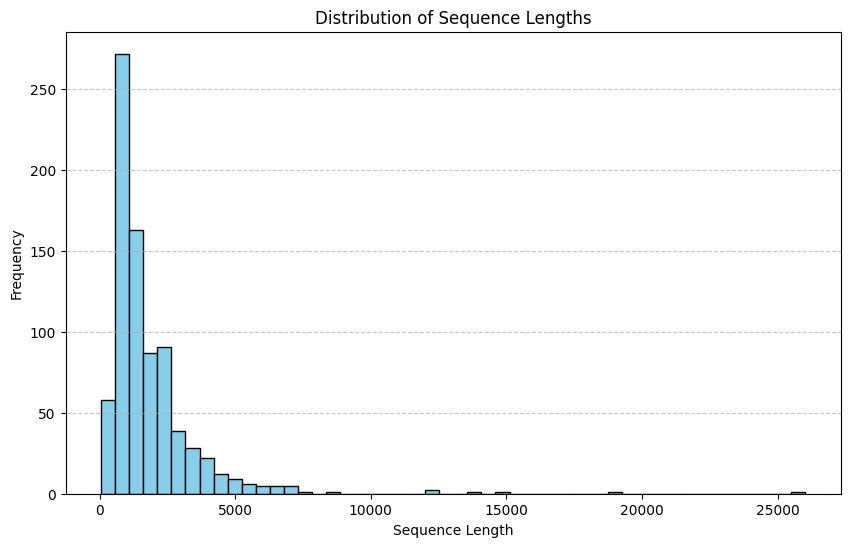

In [7]:
# Plotting the distribution of sequence lengths
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Function to calculate GC content
def gc_content(seq):
    g = seq.count('G')
    c = seq.count('C')
    return (g + c) / len(seq) * 100 if len(seq) > 0 else 0

In [17]:
# List to hold GC content for each sequence
gc_contents = []

In [19]:
# Parse the FASTA file and calculate GC content for each sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    gc = gc_content(record.seq.upper())  # Convert sequence to uppercase to handle any lowercase letters
    gc_contents.append(gc)

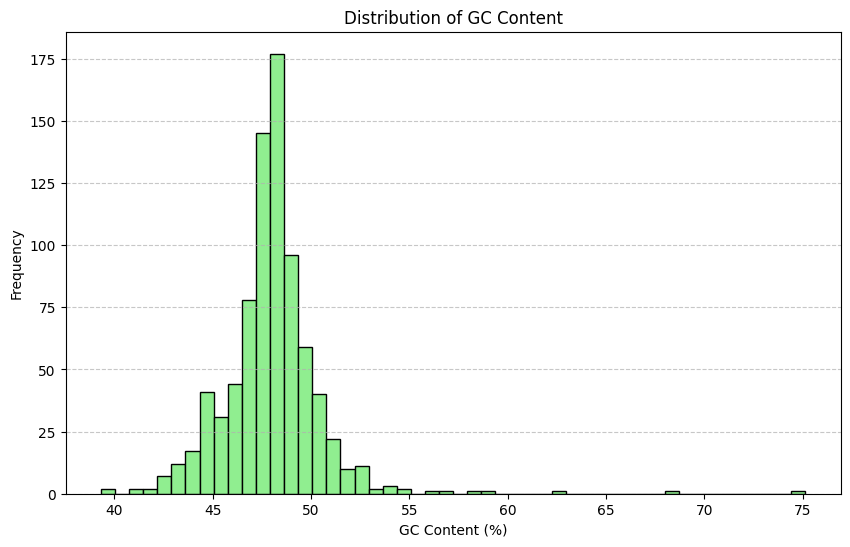

In [23]:
# Plotting the distribution of GC content
plt.figure(figsize=(10, 6))
plt.hist(gc_contents, bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribution of GC Content")
plt.xlabel("GC Content (%)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
from collections import Counter

In [27]:
# Initialize counters for total nucleotide counts across all sequences
total_counts = Counter({'A': 0, 'T': 0, 'C': 0, 'G': 0})

# Loop through each sequence to calculate individual and cumulative nucleotide frequencies
for record in SeqIO.parse(fasta_file, "fasta"):
    # Get the sequence as a string and convert to uppercase
    seq = str(record.seq).upper()
    
    # Count nucleotides in the sequence
    counts = Counter(seq)
    
    # Calculate nucleotide frequencies for this sequence
    length = len(seq)
    if length > 0:
        freq_A = counts['A'] / length * 100
        freq_T = counts['T'] / length * 100
        freq_C = counts['C'] / length * 100
        freq_G = counts['G'] / length * 100
        print(f"Sequence ID: {record.id}")
        print(f"A: {freq_A:.2f}%, T: {freq_T:.2f}%, C: {freq_C:.2f}%, G: {freq_G:.2f}%\n")

    # Update total counts for cumulative analysis
    total_counts.update(counts)

# Calculate total nucleotide frequencies across all sequences
total_length = sum(total_counts.values())
if total_length > 0:
    overall_freq_A = total_counts['A'] / total_length * 100
    overall_freq_T = total_counts['T'] / total_length * 100
    overall_freq_C = total_counts['C'] / total_length * 100
    overall_freq_G = total_counts['G'] / total_length * 100
    print("Overall Nucleotide Frequencies Across All Sequences:")
    print(f"A: {overall_freq_A:.2f}%, T: {overall_freq_T:.2f}%, C: {overall_freq_C:.2f}%, G: {overall_freq_G:.2f}%")

Sequence ID: SRR29768628.1
A: 26.39%, T: 25.86%, C: 27.57%, G: 20.18%

Sequence ID: SRR29768628.2
A: 27.13%, T: 22.60%, C: 22.11%, G: 28.17%

Sequence ID: SRR29768628.3
A: 25.19%, T: 25.98%, C: 26.33%, G: 22.50%

Sequence ID: SRR29768628.4
A: 25.70%, T: 27.04%, C: 27.58%, G: 19.68%

Sequence ID: SRR29768628.5
A: 26.09%, T: 25.64%, C: 27.90%, G: 20.36%

Sequence ID: SRR29768628.6
A: 26.24%, T: 25.74%, C: 27.61%, G: 20.41%

Sequence ID: SRR29768628.7
A: 24.50%, T: 26.41%, C: 25.30%, G: 23.79%

Sequence ID: SRR29768628.8
A: 32.14%, T: 28.55%, C: 23.62%, G: 15.70%

Sequence ID: SRR29768628.9
A: 27.27%, T: 28.33%, C: 22.47%, G: 21.93%

Sequence ID: SRR29768628.10
A: 25.77%, T: 26.87%, C: 23.28%, G: 24.08%

Sequence ID: SRR29768628.11
A: 27.17%, T: 23.98%, C: 25.45%, G: 23.40%

Sequence ID: SRR29768628.12
A: 28.44%, T: 26.45%, C: 25.88%, G: 19.24%

Sequence ID: SRR29768628.13
A: 26.55%, T: 27.91%, C: 20.59%, G: 24.95%

Sequence ID: SRR29768628.14
A: 27.96%, T: 25.53%, C: 24.80%, G: 21.71%

S

In [29]:
# Initialize a counter for k-mers (6-mers)
kmer_length = 6
kmer_counts = Counter()

In [31]:
# Parse the FASTA file and count 6-mers in each sequence
for record in SeqIO.parse(fasta_file, "fasta"):
    sequence = str(record.seq).upper()
    
    # Extract and count each 6-mer in the sequence
    for i in range(len(sequence) - kmer_length + 1):
        kmer = sequence[i:i + kmer_length]
        kmer_counts[kmer] += 1

In [33]:
# Display the most common 6-mers and their frequencies
print("Most common 6-mers and their frequencies:")
for kmer, count in kmer_counts.most_common(10):  # Display top 10 most common 6-mers
    print(f"{kmer}: {count}")

# Optional: Display all k-mer counts
# for kmer, count in kmer_counts.items():
#     print(f"{kmer}: {count}")

Most common 6-mers and their frequencies:
AGAGAG: 3268
GAGAGA: 3209
CTTTAA: 3042
AGGTGC: 2655
TGCTAA: 2597
CGTATT: 2319
CCAACT: 2253
ACTACG: 2231
CTTTCG: 2218
TGCTTT: 2173
